In [1]:
import pandas as pd
import math
import numpy as np
import networkx as nx 
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

In [2]:
df=pd.read_csv('pokec.csv', delimiter = "\t")

In [3]:
df

,user_id,completion_percentage,AGE,GenderMF,Height,Weight,BMI,MaritalStatus,SmokingStatus,DrinkingStatus,...,I_like_music,I_mostly_like_listening_to_music,the_idea_of_good_evening,I_like_specialties_from_kitchen,I_am_going_to_concerts,my_active_sports,my_passive_sports,profession,I_like_books,life_style
0,1,14,26,Male,185.0,90.0,26.296567,Other,Other,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,62,22,Female,166.0,58.0,21.048048,Single,Non Smoker,Occasional Drinker,...,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN,NaN
2,16,64,23,Male,173.0,70.0,23.388687,Single,Other,Other,...,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem,NaN
3,3,38,29,Male,172.0,63.0,21.295295,Single,Other,Other,...,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN,NaN
4,17,47,27,Female,162.0,60.0,22.862369,Other,Non Smoker,Occasional Drinker,...,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/ma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146299,1632788,29,19,Male,190.0,55.0,15.235457,Other,Other,Other,...,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN,NaN
1146300,1632790,31,22,Female,172.0,63.0,21.295295,Other,Other,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj...",NaN
1146301,1632792,26,35,Female,172.0,63.0,21.295295,Single,Other,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146302,1632796,28,22,Male,172.0,74.0,25.013521,Other,Non Smoker,Occasional Drinker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/ib..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146304 entries, 0 to 1146303
Data columns (total 51 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   user_id                           1146304 non-null  int64  
 1   completion_percentage             1146304 non-null  int64  
 2   AGE                               1146304 non-null  int64  
 3   GenderMF                          1146304 non-null  object 
 4   Height                            1134375 non-null  float64
 5   Weight                            1132164 non-null  float64
 6   BMI                               1115447 non-null  float64
 7   MaritalStatus                     1146304 non-null  object 
 8   SmokingStatus                     1146304 non-null  object 
 9   DrinkingStatus                    1146304 non-null  object 
 10  AgeGroup                          1146304 non-null  object 
 11  YearsSinceReg                     114

In [11]:
len(df['completed_level_of_education'].value_counts())

134386

In [1]:
df['sign_in_zodiac'].dropna().value_counts()[0:30]

NameError: name 'df' is not defined

In [18]:
df[df.YearsSinceReg==21].isnull().sum()

user_id                                0
completion_percentage                  0
AGE                                    0
GenderMF                               0
Height                                 8
Weight                                 6
BMI                                   16
MaritalStatus                          0
SmokingStatus                          0
DrinkingStatus                         0
AgeGroup                               0
YearsSinceReg                          0
BMIGroup                             179
ProfileStatus                          0
region                                 0
last_login                             0
registration                           0
I_am_working_in_field                916
spoken_languages                     692
hobbies                              520
I_most_enjoy_good_food               795
pets                                 793
body_type                            773
my_eyesight                          762
eye_color       

In [4]:
df.drop(axis=1, columns='life_style', inplace=True)

In [9]:
toy=df.dropna()

In [3]:
df.columns

Index(['user_id', 'completion_percentage', 'AGE', 'GenderMF', 'Height',
       'Weight', 'BMI', 'MaritalStatus', 'SmokingStatus', 'DrinkingStatus',
       'AgeGroup', 'YearsSinceReg', 'BMIGroup', 'ProfileStatus', 'region',
       'last_login', 'registration', 'I_am_working_in_field',
       'spoken_languages', 'hobbies', 'I_most_enjoy_good_food', 'pets',
       'body_type', 'my_eyesight', 'eye_color', 'hair_color', 'hair_type',
       'completed_level_of_education', 'favourite_color',
       'relation_to_smoking', 'relation_to_alcohol', 'sign_in_zodiac',
       'on_pokec_i_am_looking_for', 'love_is_for_me', 'relation_to_casual_sex',
       'my_partner_should_be', 'marital_status', 'children',
       'relation_to_children', 'I_like_movies', 'I_like_watching_movie',
       'I_like_music', 'I_mostly_like_listening_to_music',
       'the_idea_of_good_evening', 'I_like_specialties_from_kitchen',
       'I_am_going_to_concerts', 'my_active_sports', 'my_passive_sports',
       'profession', '

In [10]:
df['I_most_enjoy_good_food'].dropna().head(30)

0                                  v dobrej restauracii
1                             pri svieckach s partnerom
2                                  v dobrej restauracii
5                                  v dobrej restauracii
8                v posteli, s niekym koho mam velmi rad
10    kazdy kto ma pozna vie ze mi je uplne jedno kd...
11                                 pri telke, v posteli
12           pri telke, v dobrej restauracii, v posteli
13    pri svieckach s partnerom, v dobrej restauraci...
14    pri telke, pri svieckach s partnerom, v postel...
15                 pri svieckach s partnerom, v posteli
17                                v posteli,, pri telke
18                      pri telke, v dobrej restauracii
19                                            v posteli
20                                   vacsinou z taniera
21                  ★  v kuchyni pri stole, pri telke ★
22                                            pri telke
23           pri telke, v dobrej restauracii, v 

In [8]:
df['my_eyesight'].dropna().head(30)

1                                               vyborny
2            to co by som mal nosit tak nenosim asi tak
5       ze vraj pridavaju na inteligencii...no neviem:)
7                    niekedy vidim aj to co oci nevidia
8          no proste moje oci vydia iba to co potrebuju
10                                              vyborny
11                                              vyborny
12                                              vyborny
13                                              vyborny
14                        vyborny, ...nic mi neunikne:)
15                  vyborny, vydim aj to co iny nevidia
19                                              vyborny
20                                              vyborny
21                                ★ vidim to co chcem ★
23             zatial si dovidim na nos takze v poho :d
24    vyborny, kym vidim na cestu pred sebou tak je ...
25                              nosim kontaktne sosovky
26                                              

In [9]:
df['hair_color'].dropna().head(20)

1                                                cierne
2                                           hnede hnede
3                                                 hnede
4                                      blond, odfarbene
5     hnede, kedysi som ol blondak ale uz sa za to n...
6                                               cervene
7                                              ako kedy
8                                                 hnede
10                    hnede.....na kohutika... :) :) :)
11                                                hnede
12                     ako kedy,ale teraz ruzovo-cierne
13                                                hnede
14                             prirodnu si nepamatam...
15    hnede, strapaty ako jezko ked do neho trafi blesk
16                                       vacsinou hnede
18                                                hnede
19                                                hnede
20                                              

# working on apriori

In [6]:
cols=['user_id','AgeGroup','I_like_movies','SmokingStatus']

In [7]:
toys=df[cols]

In [8]:
toys=toys.dropna()

In [9]:
toys['new'] = toys.I_like_movies.str.findall('(komedie|akcne|horory|serialy|romanticke|vojnove|rodinne|sci-fi|historicke|eroticke|zahadne|mysteriozne|dramy|dokumentarne|fantasy|muzikaly|kasove trhaky|umelecke)').apply(','.join,1)

In [10]:
toy=toys[toys.new != '']

In [11]:
basket=pd.DataFrame()
basket['user_id']=toy['user_id']

In [12]:
genere=['komedie','akcne','horory','serialy','romanticke','vojnove','rodinne','sci-fi','historicke','eroticke','zahadne','mysteriozne','dramy','dokumentarne','fantasy','muzikaly','kasove trhaky','umelecke']

In [13]:
for i in genere:
    basket[i]=toy["new"].map(lambda x: 1 if i in x else 0)

In [14]:
basket

,user_id,komedie,akcne,horory,serialy,romanticke,vojnove,rodinne,sci-fi,historicke,eroticke,zahadne,mysteriozne,dramy,dokumentarne,fantasy,muzikaly,kasove trhaky,umelecke
1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
5,5,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0
6,18,1,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0
8,19,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146281,1632746,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1146282,1632753,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1146290,1632767,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1146296,1632782,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [15]:
basket['SmokingStatus']=toy['SmokingStatus']

# Apriori

In [16]:
bas=basket.iloc[0:70000]
bas=bas.set_index('user_id') 
bas.drop(axis=1, columns='SmokingStatus', inplace=True)
bas

,komedie,akcne,horory,serialy,romanticke,vojnove,rodinne,sci-fi,historicke,eroticke,zahadne,mysteriozne,dramy,dokumentarne,fantasy,muzikaly,kasove trhaky,umelecke
user_id,,,,,,,,,,,,,,,,,,
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
5,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0
18,1,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0
19,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128255,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
128285,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128327,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1


In [17]:
ap_items = apriori(bas, min_support=0.09, use_colnames=True)
start = time. time()
for i in range(10000):
    end = time. time()
    print ("Time elapsed:", end - start)

Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.0009975433349609375
Time elapsed: 0.000997543334

Time elapsed: 0.18548083305358887
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2174229621887207
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elapsed: 0.2184295654296875
Time elap

Time elapsed: 0.4038965702056885
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.4048941135406494
Time elapsed: 0.40591883659362793
Time elap

Time elapsed: 0.574479341506958
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.5993733406066895
Time elapsed: 0.6003706455230713
Time elapsed: 0.6003706455230713
Time elapsed: 0.6003706455230713
Time elapsed: 0.6003706455230713
Time elapsed: 0.6003706455230713
Time elapsed: 0.6003706455230713
Time elapse

Time elapsed: 0.7789304256439209
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.7799229621887207
Time elapsed: 0.8008356094360352
Time elapsed: 0.8018712997436523
Time elapsed: 0.8018712997436523
Time elapsed: 0.8018712997436523
Time elapsed: 0.8018712997436523
Time elaps

Time elapsed: 0.9664199352264404
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elapsed: 0.9674177169799805
Time elaps

Time elapsed: 1.1529269218444824
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.1718754768371582
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287278175354
Time elapsed: 1.17287

In [18]:
ap_items

,support,itemsets
0,0.851300,(komedie)
1,0.636557,(akcne)
2,0.611971,(horory)
3,0.401457,(serialy)
4,0.380914,(romanticke)
...,...,...
282,0.090200,"(akcne, romanticke, komedie, rodinne, serialy)"
283,0.097286,"(akcne, zahadne, komedie, mysteriozne, serialy)"
284,0.097900,"(akcne, zahadne, komedie, mysteriozne, sci-fi)"
285,0.096686,"(zahadne, horory, komedie, mysteriozne, serialy)"


In [19]:
ap_rule=association_rules(ap_items, min_threshold=0.7)
ap_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(akcne),(komedie),0.636557,0.851300,0.570171,0.895711,1.052169,0.028270,1.425850
1,(horory),(komedie),0.611971,0.851300,0.536571,0.876792,1.029944,0.015600,1.206899
2,(serialy),(komedie),0.401457,0.851300,0.374029,0.931677,1.094417,0.032268,2.176441
3,(romanticke),(komedie),0.380914,0.851300,0.347900,0.913329,1.072864,0.023628,1.715680
4,(vojnove),(komedie),0.317014,0.851300,0.281143,0.886846,1.041755,0.011269,1.314138
...,...,...,...,...,...,...,...,...,...
507,"(sci-fi, mysteriozne, zahadne)","(horory, komedie)",0.115286,0.536571,0.090057,0.781165,1.455845,0.028198,2.117706
508,"(sci-fi, mysteriozne, horory)","(zahadne, komedie)",0.094957,0.197629,0.090057,0.948398,4.798890,0.071291,15.549163
509,"(sci-fi, mysteriozne, komedie)","(horory, zahadne)",0.109443,0.162786,0.090057,0.822869,5.054922,0.072241,4.726528
510,"(sci-fi, zahadne)","(mysteriozne, horory, komedie)",0.115914,0.150643,0.090057,0.776929,5.157422,0.072595,3.807560


# FPgrowth

In [20]:
toy['SmokingStatus'].value_counts()

Non Smoker           407367
Other                121353
Regular Smoker       102315
Occasional Smoker     71157
Name: SmokingStatus, dtype: int64

In [21]:
low_smoker=basket[basket.SmokingStatus == 'Occasional Smoker']
low_smoker=low_smoker.set_index('user_id')
low_smoker.drop(axis=1, columns='SmokingStatus', inplace=True)
low_smoker

,komedie,akcne,horory,serialy,romanticke,vojnove,rodinne,sci-fi,historicke,eroticke,zahadne,mysteriozne,dramy,dokumentarne,fantasy,muzikaly,kasove trhaky,umelecke
user_id,,,,,,,,,,,,,,,,,,
33,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
78,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0
106,1,1,1,1,0,1,0,1,1,1,0,0,0,1,0,0,1,0
113,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
172,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632552,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0
1632641,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1632667,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0


In [22]:
fprule=fpgrowth(low_smoker, min_support=0.09, use_colnames=True)
start = time. time()
for i in range(10000):
    end = time. time()
    print ("Time elapsed:", end - start)

Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.0009906291961669922
Time elapsed: 0.000990629196

Time elapsed: 0.15857243537902832
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.1884615421295166
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945860862731934
Time elapsed: 0.18945

Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.3630218505859375
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.36401987075805664
Time elapsed: 0.3640198707

Time elapsed: 0.5495235919952393
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5505237579345703
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elapsed: 0.5515127182006836
Time elaps

Time elapsed: 0.7270538806915283
Time elapsed: 0.7489621639251709
Time elapsed: 0.7489621639251709
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elapsed: 0.7499597072601318
Time elaps

Time elapsed: 0.9244921207427979
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elapsed: 0.9254894256591797
Time elaps

Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.11600923538208
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.116990089416504
Time elapsed: 1.1169900

In [23]:
fprule

,support,itemsets
0,0.589134,(akcne)
1,0.548463,(horory)
2,0.274548,(vojnove)
3,0.263558,(sci-fi)
4,0.261661,(historicke)
...,...,...
178,0.099035,"(dramy, romanticke)"
179,0.092233,"(dramy, serialy)"
180,0.116854,"(akcne, dramy, komedie)"
181,0.112610,"(dramy, horory, komedie)"


In [28]:
fps=association_rules(fprule, min_threshold=0.7)
fps

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(akcne),(komedie),0.589134,0.776101,0.497702,0.844803,1.088523,0.040475,1.442681
1,(horory),(komedie),0.548463,0.776101,0.458957,0.836805,1.078217,0.033294,1.371976
2,"(komedie, horory)",(akcne),0.458957,0.589134,0.325871,0.710025,1.205202,0.055484,1.416902
3,"(horory, akcne)",(komedie),0.371334,0.776101,0.325871,0.877569,1.130741,0.037679,1.828776
4,(vojnove),(akcne),0.274548,0.589134,0.223351,0.813524,1.380881,0.061606,2.203316
...,...,...,...,...,...,...,...,...,...
217,"(akcne, dramy)",(komedie),0.129292,0.776101,0.116854,0.903804,1.164545,0.016511,2.327540
218,"(komedie, dramy)",(horory),0.159127,0.548463,0.112610,0.707675,1.290286,0.025335,1.544638
219,"(horory, dramy)",(komedie),0.127296,0.776101,0.112610,0.884632,1.139842,0.013816,1.940746
220,"(horory, dramy)",(akcne),0.127296,0.589134,0.097011,0.762089,1.293575,0.022016,1.726972


In [29]:
fps[(fps['confidence'] >= 0.9) ].iloc[0:50]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,"(vojnove, horory, akcne)",(komedie),0.160589,0.776101,0.145467,0.905837,1.167164,0.020834,2.377785
19,"(komedie, vojnove, eroticke)",(akcne),0.103658,0.589134,0.094046,0.907267,1.540001,0.032977,4.430626
20,"(vojnove, akcne, eroticke)",(komedie),0.103110,0.776101,0.094046,0.912089,1.175220,0.014022,2.546898
22,"(vojnove, serialy)",(komedie),0.104768,0.776101,0.098557,0.940711,1.212099,0.017246,3.776400
28,"(sci-fi, akcne)",(komedie),0.215636,0.776101,0.194935,0.904002,1.164799,0.027580,2.332322
36,"(horory, sci-fi, akcne)",(komedie),0.167264,0.776101,0.153478,0.917577,1.182291,0.023664,2.716462
39,"(vojnove, sci-fi)",(akcne),0.128491,0.589134,0.117894,0.917533,1.557426,0.042196,4.982160
41,"(vojnove, sci-fi)",(komedie),0.128491,0.776101,0.116095,0.903533,1.164195,0.016374,2.320988
42,"(horory, vojnove, sci-fi)",(akcne),0.102168,0.589134,0.095858,0.938239,1.592574,0.035668,6.652554
46,"(horory, vojnove, sci-fi)",(komedie),0.102168,0.776101,0.094242,0.922421,1.188532,0.014949,2.886077


# FPMax

In [30]:
fpmax_item=fpmax(low_smoker, min_support=0.08, use_colnames=True)
start = time. time()
for i in range(10000):
    end = time. time()
    print ("Time elapsed:", end - start)

Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elapsed: 0.0
Time elaps

Time elapsed: 0.17180752754211426
Time elapsed: 0.19360733032226562
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 0.19460368156433105
Time elapsed: 

Time elapsed: 0.35196995735168457
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 0.38321876525878906
Time elapsed: 

Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elapsed: 0.5702576637268066
Time elaps

Time elapsed: 0.7330279350280762
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elapsed: 0.7564945220947266
Time elaps

In [31]:
fpmax_item

,support,itemsets
0,0.082508,(kasove trhaky)
1,0.084222,"(komedie, muzikaly)"
2,0.081707,"(fantasy, serialy)"
3,0.080625,"(fantasy, sci-fi, horory)"
4,0.084152,"(fantasy, komedie, sci-fi, akcne)"
5,0.083913,"(fantasy, komedie, horory, akcne)"
6,0.081018,"(historicke, dramy)"
7,0.087061,"(komedie, serialy, dramy)"
8,0.089689,"(komedie, romanticke, dramy)"
9,0.088902,"(dramy, komedie, horory, akcne)"


In [32]:
fpsmax=association_rules(fpmax_item, min_threshold=0.1,support_only=True)
fpsmax

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(komedie, dokumentarne)",(akcne),NaN,NaN,0.120157,NaN,NaN,NaN,NaN
1,"(komedie, akcne)",(dokumentarne),NaN,NaN,0.120157,NaN,NaN,NaN,NaN
2,"(dokumentarne, akcne)",(komedie),NaN,NaN,0.120157,NaN,NaN,NaN,NaN
3,(komedie),"(dokumentarne, akcne)",NaN,NaN,0.120157,NaN,NaN,NaN,NaN
4,(dokumentarne),"(komedie, akcne)",NaN,NaN,0.120157,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
105,"(horory, akcne)","(komedie, romanticke)",NaN,NaN,0.130191,NaN,NaN,NaN,NaN
106,(komedie),"(romanticke, horory, akcne)",NaN,NaN,0.130191,NaN,NaN,NaN,NaN
107,(romanticke),"(komedie, horory, akcne)",NaN,NaN,0.130191,NaN,NaN,NaN,NaN
108,(horory),"(komedie, romanticke, akcne)",NaN,NaN,0.130191,NaN,NaN,NaN,NaN


# Visualizations

In [33]:
###function for visualization
def draw_graph(fps, rules_to_show,title):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50  
    colors = np.random.rand(N)      
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
        for a in fps['antecedents'].iloc[i]:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 15)
        for a in fps['consequents'].iloc[i]:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    x=nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=28, with_labels=False)
    for p in pos:  # raise text positions 
        pos[p][1] += 0.1
    plt.title(title)
    nx.draw_networkx_labels(G1, pos)
    fig = plt.figure(figsize = (10, 10))
    plt.show()
    

# FPgrowth 

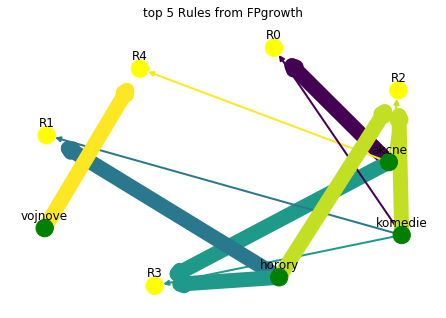

<Figure size 720x720 with 0 Axes>

In [34]:
draw_graph (fps.head(10), 5,'top 5 Rules from FPgrowth')

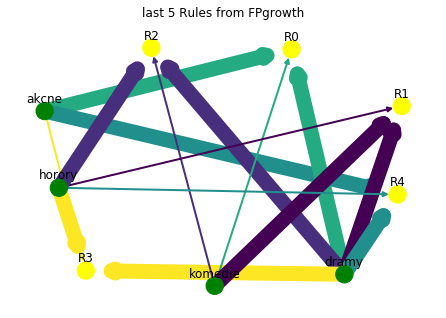

<Figure size 720x720 with 0 Axes>

In [35]:
draw_graph (fps.tail(5), 5,'last 5 Rules from FPgrowth')

# Apriori (Simple)

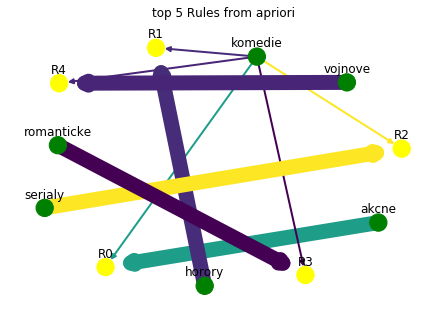

<Figure size 720x720 with 0 Axes>

In [36]:
draw_graph (ap_rule.head(10), 5,'top 5 Rules from apriori')

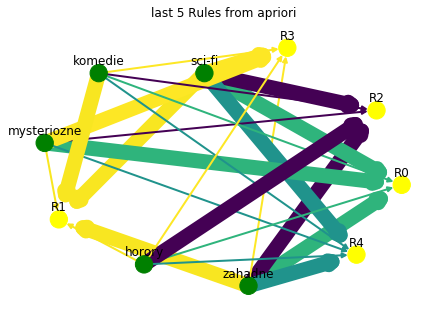

<Figure size 720x720 with 0 Axes>

In [37]:
draw_graph (ap_rule.tail(5), 5,'last 5 Rules from apriori')

# FPMax (Intresting Rules)

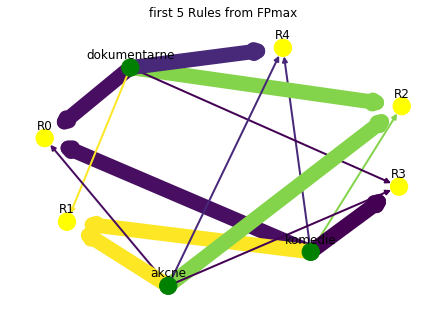

<Figure size 720x720 with 0 Axes>

In [38]:
draw_graph (fpsmax.head(5), 5,'first 5 Rules from FPmax')

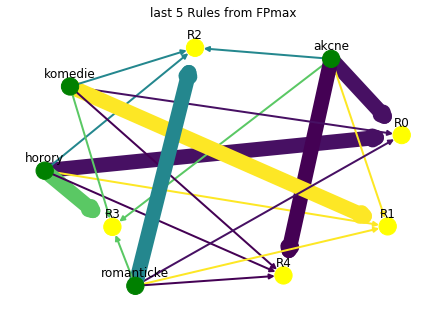

<Figure size 720x720 with 0 Axes>

In [39]:
draw_graph (fpsmax.tail(5), 5,'last 5 Rules from FPmax')

# GUI for assign

In [40]:
y=fprule.to_json(orient="records")
s=pd.read_json(y)
types={'itemsets': str}
s=s.astype(types,copy=False)
fpitems = s.iloc[0:10]
fpitems

,support,itemsets
0,0.589134,['akcne']
1,0.548463,['horory']
2,0.274548,['vojnove']
3,0.263558,['sci-fi']
4,0.261661,['historicke']
5,0.776101,['komedie']
6,0.378403,['romanticke']
7,0.327881,['serialy']
8,0.250783,['rodinne']
9,0.191633,['zahadne']


In [41]:
y=ap_items.to_json(orient="records")
s=pd.read_json(y)
types={'itemsets': str}
s=s.astype(types,copy=False)
apr_item = s.iloc[0:10]
apr_item

,support,itemsets
0,0.851300,['komedie']
1,0.636557,['akcne']
2,0.611971,['horory']
3,0.401457,['serialy']
4,0.380914,['romanticke']
5,0.317014,['vojnove']
6,0.303886,['rodinne']
7,0.296957,['sci-fi']
8,0.263214,['historicke']
9,0.223714,['eroticke']


In [42]:
y=fpmax_item.to_json(orient="records")
s=pd.read_json(y)
types={'itemsets': str}
s=s.astype(types,copy=False)
fpm_item = s.iloc[0:10]
fpm_item

,support,itemsets
0,0.082508,['kasove trhaky']
1,0.084222,"['komedie', 'muzikaly']"
2,0.081707,"['fantasy', 'serialy']"
3,0.080625,"['fantasy', 'sci-fi', 'horory']"
4,0.084152,"['fantasy', 'komedie', 'sci-fi', 'akcne']"
5,0.083913,"['fantasy', 'komedie', 'horory', 'akcne']"
6,0.081018,"['historicke', 'dramy']"
7,0.087061,"['komedie', 'serialy', 'dramy']"
8,0.089689,"['komedie', 'romanticke', 'dramy']"
9,0.088902,"['dramy', 'komedie', 'horory', 'akcne']"


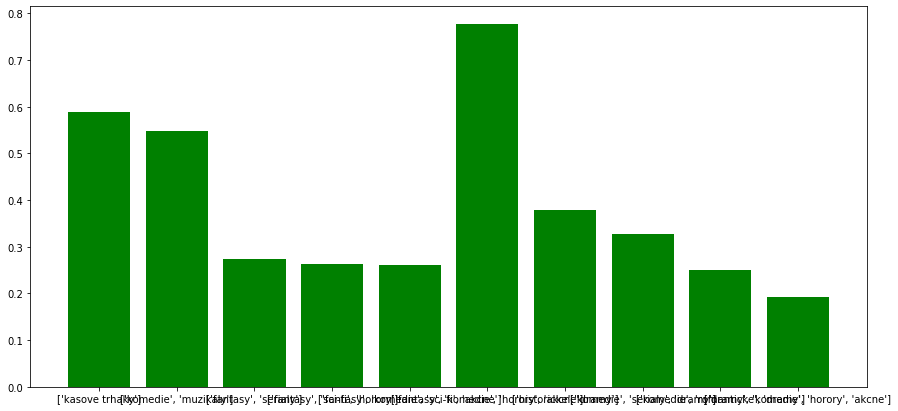

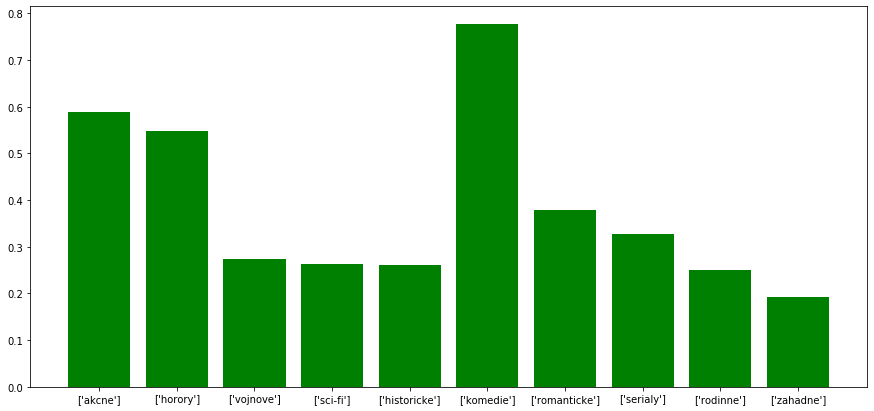

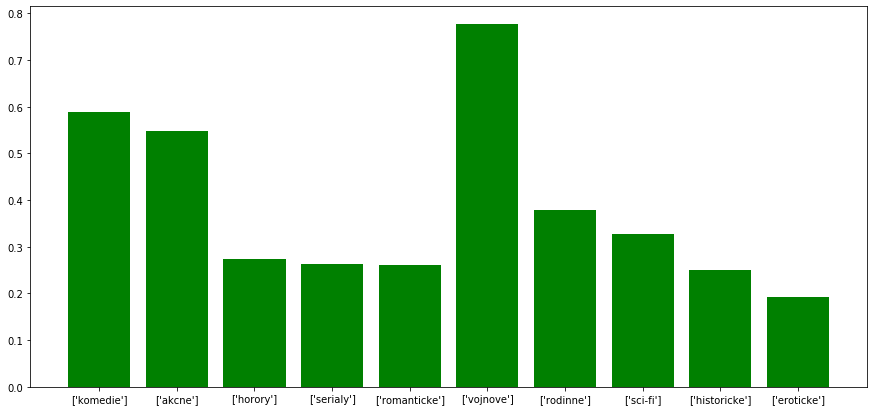

In [43]:
import tkinter as tk
    
root = tk.Tk()
root.title("I20-2219 GUI")
frame = tk.Frame(root)
frame.pack(side=tk.BOTTOM)
frame2 = tk.Frame(frame)
frame2.pack(side=tk.BOTTOM)
frame3 = tk.Frame(frame)
frame3.pack(side=tk.BOTTOM)
frame4 = tk.Frame(frame)
frame4.pack(side=tk.BOTTOM)
def fp_max():
    fig = plt.figure(figsize = (15, 7))
    plt.bar(fpm_item['itemsets'],fpitems['support'], color = 'g')
    plt.show()
def apr():
    fig = plt.figure(figsize = (15, 7))
    plt.bar(apr_item['itemsets'],fpitems['support'], color = 'g')
    plt.show()
def fp_growth():
    fig = plt.figure(figsize = (15, 7))
    plt.bar(fpitems['itemsets'],fpitems['support'], color = 'g')
    plt.show()
def assign2():
    aprior = tk.Button(frame,text="Apriori",command=apr)
    aprior.pack(side=tk.BOTTOM)
    fggrowt = tk.Button(frame,text="FPgrowth",command=fp_growth)
    fggrowt.pack(side=tk.BOTTOM)
    fgmax = tk.Button(frame,text="FPMax",command=fp_max)
    fgmax.pack(side=tk.BOTTOM)

button1 = tk.Button(root,text="Assigmnet 1",command=quit)
button1.pack(side=tk.LEFT)
button2 = tk.Button(root,text="Assignment 2",command=assign2)
button2.pack(side=tk.LEFT)

root.mainloop()

In [ ]:
F:\Desktop\MS Data Science\2nd Semester\big data analytics\GUI Assign2